# Classifying Mushrooms using Machine Learning

## 1. Problem Definition
What we're trying to answer is
> How to classify whether if a mushroom edible or not based on their known features

## 2. Data
Dataset from Kaggle called Mushroom Classification: https://www.kaggle.com/uciml/mushroom-classification

## 3. Evaluation
For this problem, using Random Forest Classifier proved to have best predictions. See https://www.kaggle.com/uciml/mushroom-classification/tasks. But in this notebook, we're going to compare 3 machine learning models, and those are Random Forest Classifier, K-Nearest Neighbors, and Logistic Regression.

## 4. Features
* Attribute Information: (classes: edible=e, poisonous=p)
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Load dataset
df = pd.read_csv('./datasets/mushrooms.csv')

### Data exploration (exploratory data analysis - EDA)

In [3]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
df.shape

(8124, 23)

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
df['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

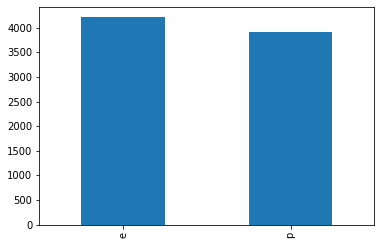

In [8]:
df['class'].value_counts().plot(kind='bar');

In [9]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
# Check for missing values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
# Let's try to compare class column with habitat
pd.crosstab(df['class'], df['habitat'])

habitat,d,g,l,m,p,u,w
class,,,,,,,
e,1880,1408,240,256,136,96,192
p,1268,740,592,36,1008,272,0


habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

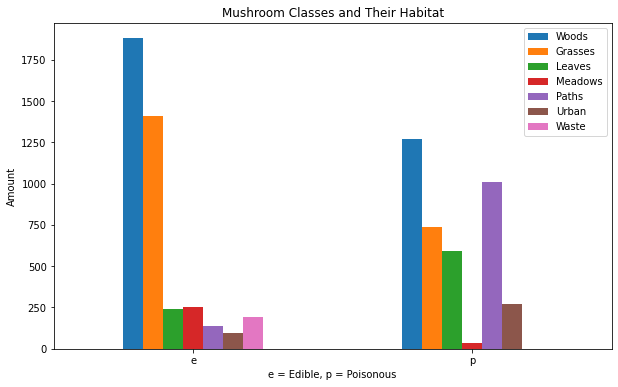

In [12]:
# Create a plot from crosstab
pd.crosstab(df['class'], df['habitat']).plot(kind='bar',
                                                 figsize=(10, 6))

# # Add some communications
plt.title('Mushroom Classes and Their Habitat')
plt.xlabel('e = Edible, p = Poisonous')
plt.ylabel('Amount')
plt.legend(['Woods', 'Grasses', 'Leaves', 'Meadows', 'Paths', 'Urban', 'Waste'])
plt.xticks(rotation=0);

#### Explore cap features
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

In [13]:
pd.crosstab(df['class'], df['cap-shape'])

cap-shape,b,c,f,k,s,x
class,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


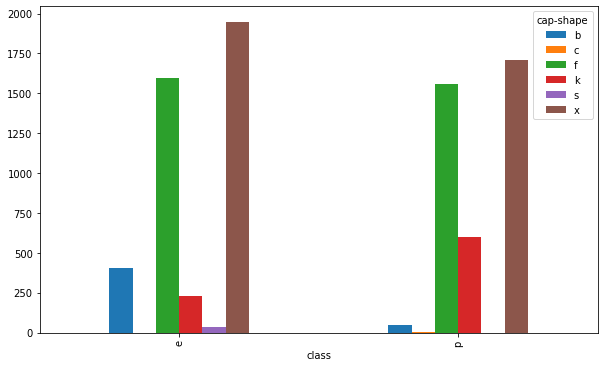

In [14]:
pd.crosstab(df['class'], df['cap-shape']).plot(kind='bar',
                                               figsize=(10, 6));

In [15]:
pd.crosstab(df['class'], df['cap-surface'])

cap-surface,f,g,s,y
class,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


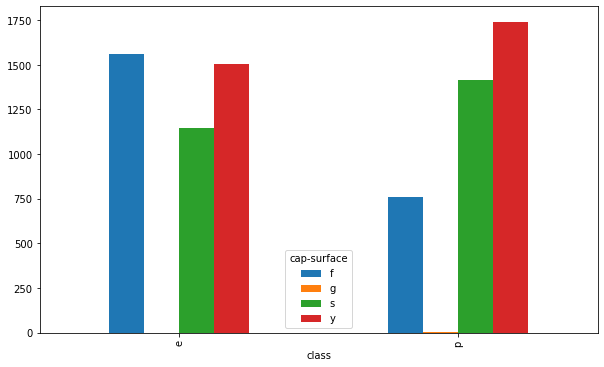

In [16]:
pd.crosstab(df['class'], df['cap-surface']).plot(kind='bar',
                                                 figsize=(10, 6));

In [17]:
pd.crosstab(df['class'], df['cap-color'])

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400
p,120,12,876,808,1020,88,0,0,320,672


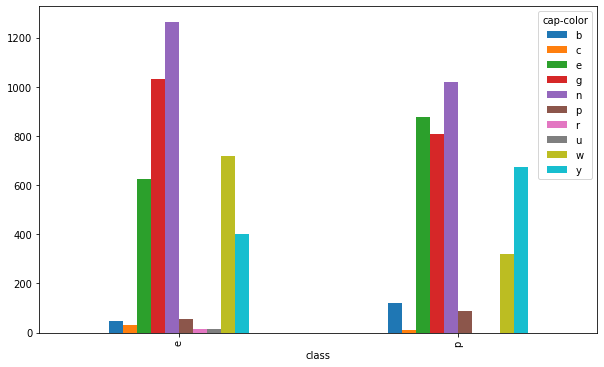

In [18]:
pd.crosstab(df['class'], df['cap-color']).plot(kind='bar',
                                               figsize=(10, 6));

#### Explore bruises and odor
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

In [19]:
pd.crosstab(df['class'], df['bruises'])

bruises,f,t
class,,
e,1456,2752
p,3292,624


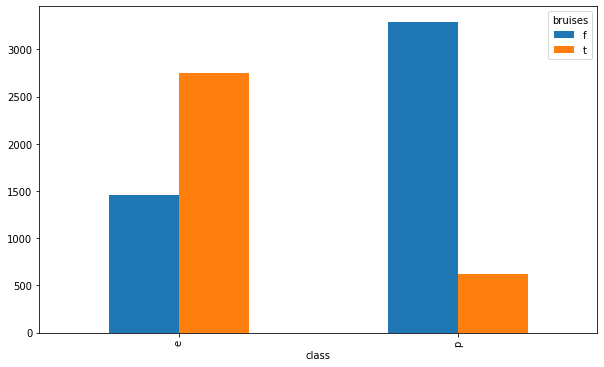

In [20]:
pd.crosstab(df['class'], df['bruises']).plot(kind='bar',
                                             figsize=(10, 6));

In [21]:
pd.crosstab(df['class'], df['odor'])

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Explore gill features
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

In [23]:
pd.crosstab(df['class'], df['gill-attachment'])

gill-attachment,a,f
class,,
e,192,4016
p,18,3898


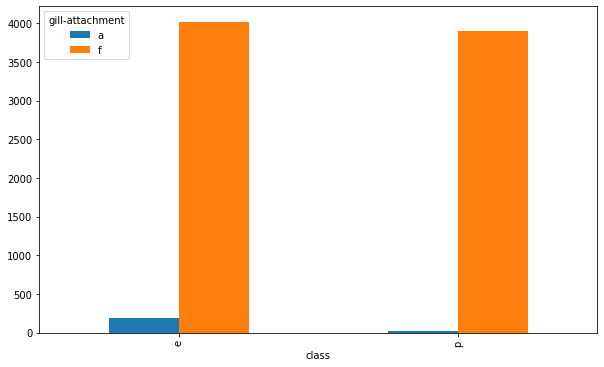

In [24]:
pd.crosstab(df['class'], df['gill-attachment']).plot(kind='bar',
                                                     figsize=(10, 6));

In [25]:
pd.crosstab(df['class'], df['gill-spacing'])

gill-spacing,c,w
class,,
e,3008,1200
p,3804,112


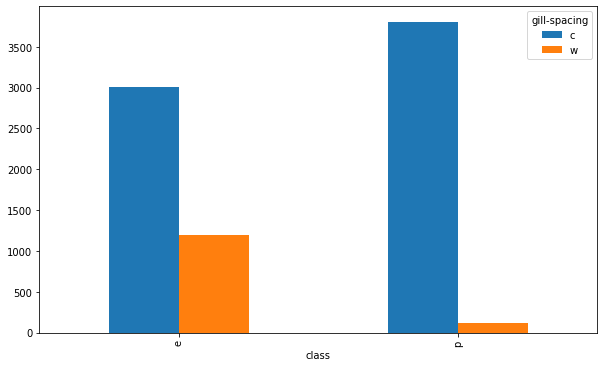

In [26]:
pd.crosstab(df['class'], df['gill-spacing']).plot(kind='bar',
                                                  figsize=(10, 6));

I think that's about it, we can always explore more

### Convert string into category data type then into numeric

To find correlation between variables so that we know which independent variables have the most impact on our class variable. Before that, the data has to be in numeric.

In [27]:
# Make a copy of our dataset in case something goes wrong
df_temp = df.copy()
df_temp.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [29]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [30]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [32]:
df_temp['cap-shape'].cat.categories

Index(['b', 'c', 'f', 'k', 's', 'x'], dtype='object')

In [33]:
df_temp['cap-shape'].cat.codes

0       5
1       5
2       0
3       5
4       5
       ..
8119    3
8120    5
8121    2
8122    3
8123    5
Length: 8124, dtype: int8

In [34]:
df_temp['cap-shape'].cat.codes.value_counts()

5    3656
2    3152
3     828
0     452
4      32
1       4
dtype: int64

In [35]:
# Convert into numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [36]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label] = pd.Categorical(content).codes

In [37]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int8 
 1   cap-shape                 8124 non-null   int8 
 2   cap-surface               8124 non-null   int8 
 3   cap-color                 8124 non-null   int8 
 4   bruises                   8124 non-null   int8 
 5   odor                      8124 non-null   int8 
 6   gill-attachment           8124 non-null   int8 
 7   gill-spacing              8124 non-null   int8 
 8   gill-size                 8124 non-null   int8 
 9   gill-color                8124 non-null   int8 
 10  stalk-shape               8124 non-null   int8 
 11  stalk-root                8124 non-null   int8 
 12  stalk-surface-above-ring  8124 non-null   int8 
 13  stalk-surface-below-ring  8124 non-null   int8 
 14  stalk-color-above-ring    8124 non-null 

In [38]:
df_temp.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [39]:
# Find the correlation
df_temp.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


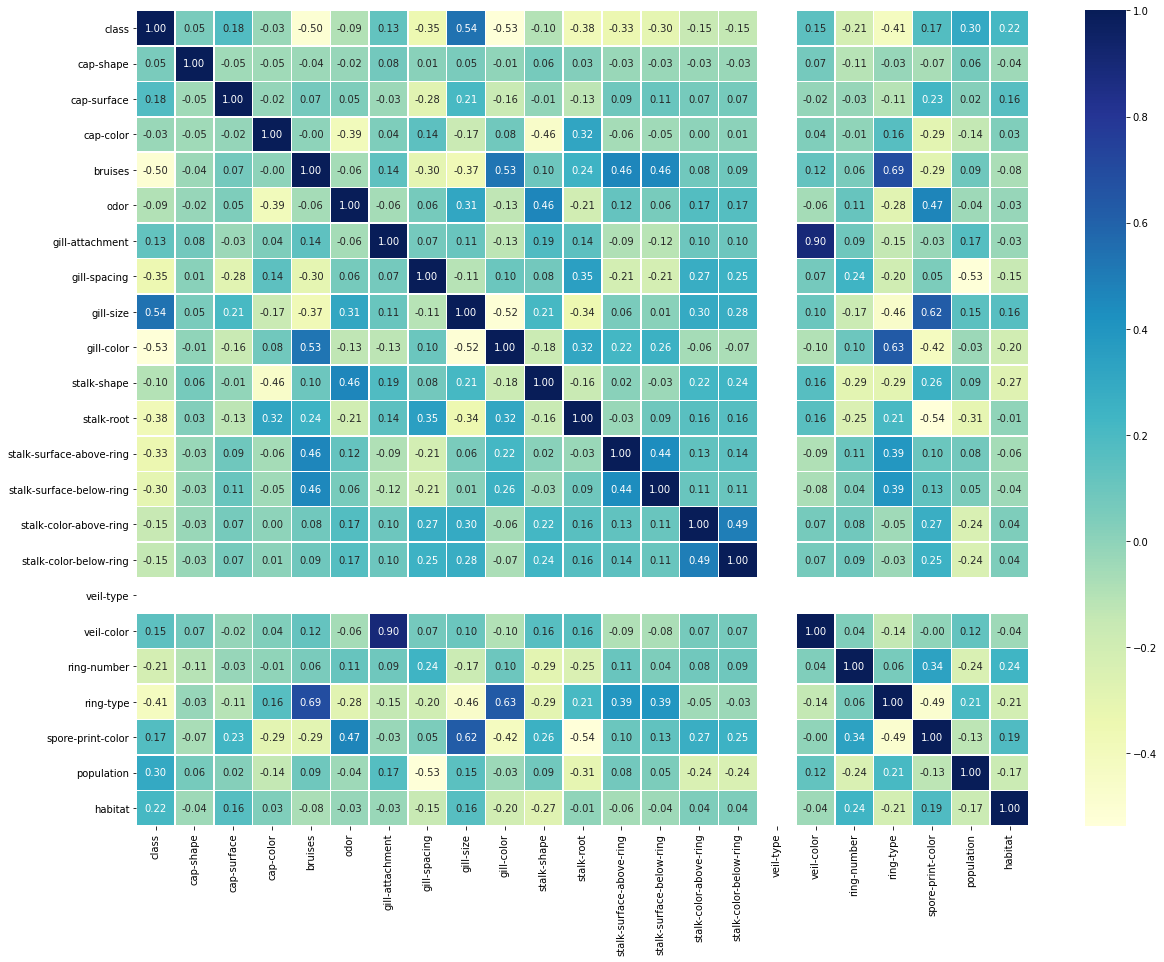

In [40]:
# Visualize the correlation
import seaborn as sns
corr_matrix = df_temp.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu');

In [41]:
df['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

In [42]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [43]:
df_temp.drop('veil-type', axis=1, inplace=True)

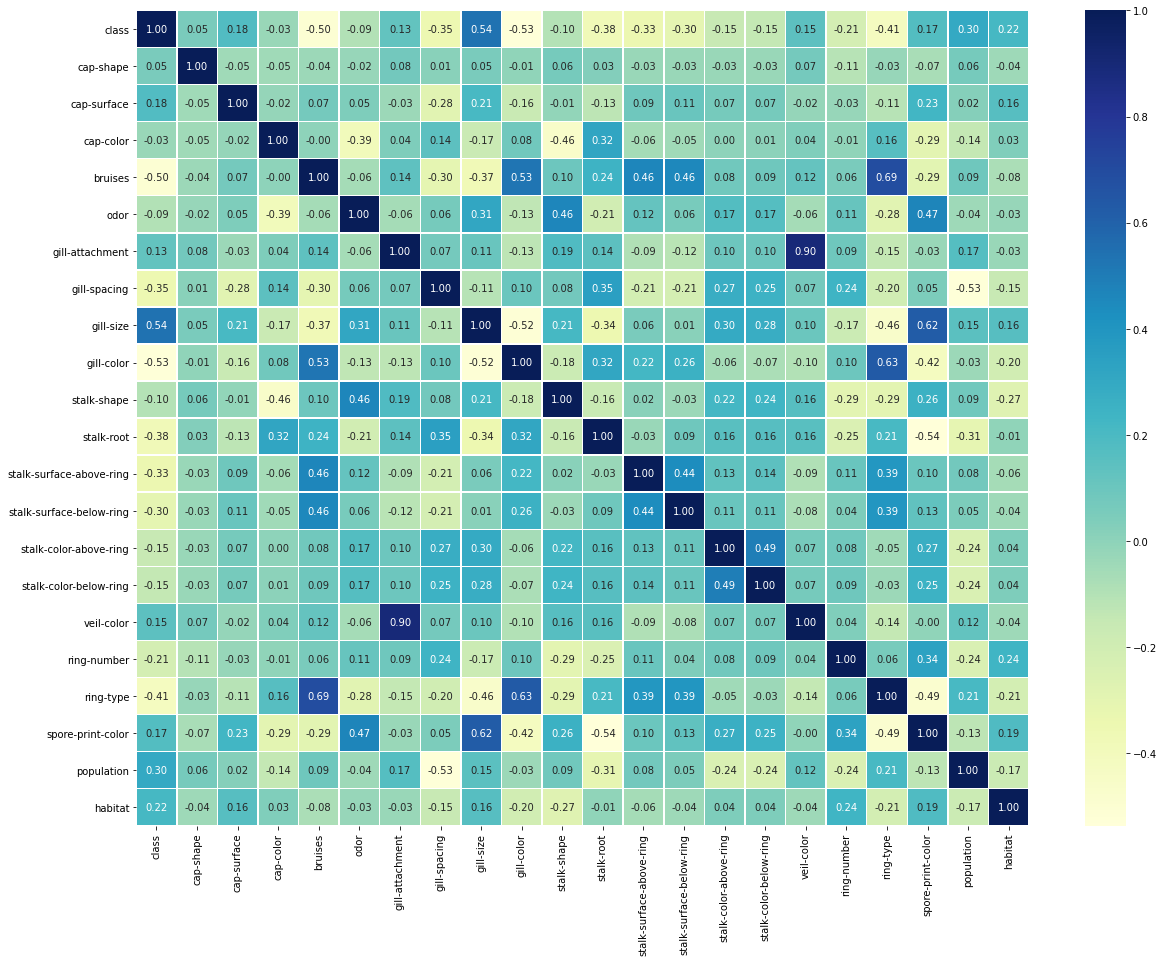

In [44]:
corr_matrix = df_temp.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu');

## 5. Modelling

The model we're going to use are:
1. `LogisticRegression`
2. `KNearestNeighbors`
3. `RandomForestClassifier`

**Why these**

The [cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suggests to use these models since we're working with classification problem.

In [45]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [46]:
df_temp.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [50]:
# Set a random seed
np.random.seed(42)

# Create the data
X = df_temp.drop('class', axis=1)
y = df_temp['class']

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
len(X_train), len(X_test), len(y_train), len(y_test)

(6499, 1625, 6499, 1625)

The algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them

In [51]:
# Put models in a dictionary
models = {'KNN': KNeighborsClassifier(),
          'LogisticRegression': LogisticRegression(),
          'Random Forest Classifier': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning models
    X-train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    '''
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\anaconda\envs\mlearning\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.9963076923076923,
 'LogisticRegression': 0.947076923076923,
 'Random Forest Classifier': 1.0}

Wow, looks like these 3 models have achieved more than 95% accuracy without being tuned, one of them even have 100% accuracy!
Let's compare them visually.

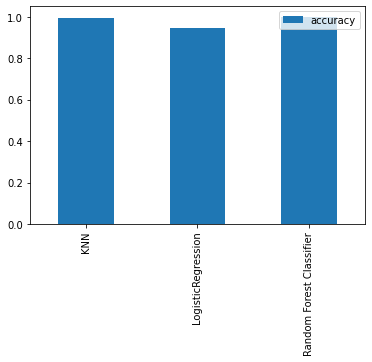

In [60]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Model comparison

Now that we've got our baseline models, let's try to tune their hyperparameters so we can get some insights, also the baseline model might not be the best yet. One of them has 100% accuracy, is it actually good?

#### Tuning hyperparameters with GridSearchCV

In [74]:
# Different KNearestNeighbors hyperparameters
knn_grid = {'leaf_size': list(range(1, 51)),
            'n_neighbors': list(range(1, 21)),
            'p': [1, 2]}

# Different LogisticRegression hyperparameters
log_grid = {'C': np.logspace(-4, 4, 20),
            'solver': ['liblinear'],
            'max_iter': [100, 200, 500, 1000]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

**KNN**

In [75]:
%%time
# Set a random seed
np.random.seed(42)

# Setup grid hyperparameters
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

# Fit grid hyperparameters search model
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  5.8min


Wall time: 5min 55s


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  5.9min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             verbose=True)

In [76]:
gs_knn.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [77]:
gs_knn.score(X_test, y_test)

1.0

**Logistic Regression**

In [83]:
# Set a random seed
np.random.seed(42)

# Setup grid hyperparameters
gs_log = GridSearchCV(LogisticRegression(),
                      param_grid=log_grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

# Fit grid hyperparameters search model
gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   17.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 500, 1000],
                         'solver': ['liblinear']},
             verbose=True)

In [84]:
gs_log.best_params_

{'C': 3792.690190732246, 'max_iter': 100, 'solver': 'liblinear'}

In [85]:
gs_log.score(X_test, y_test)

0.9661538461538461

**Random Forest Classifier**

In [86]:
# Set a random seed
np.random.seed(42)

# Setup grid hyperparameters
gs_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid=rf_grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

# Fit grid hyperparameters search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 5008 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 6058 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 7208 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 8458 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 9808 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-1)]: Done 11258 tasks      |

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [87]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [88]:
gs_rf.score(X_test, y_test)

1.0

In [89]:
# Save the models
from joblib import dump, load

dump(gs_knn, filename='./saved-model/mushrooms-classification-gs-knn.joblib')

['./saved-model/mushrooms-classification-gs-knn.joblib']

In [90]:
# Test to see if the file can be loaded
loaded_joblib_knn = load(filename='./saved-model/mushrooms-classification-gs-knn.joblib')

In [92]:
joblib_y_preds = loaded_joblib_knn.predict(X_test)
joblib_y_preds

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [94]:
# Save the other two models
dump(gs_log, filename='./saved-model/mushrooms-classification-gs-logreg.joblib')

['./saved-model/mushrooms-classification-gs-logreg.joblib']

In [95]:
dump(gs_rf, filename='./saved-model/mushrooms-classification-gs-rf.joblib')

['./saved-model/mushrooms-classification-gs-rf.joblib']

Because the training process time took too long, we saved the trained model then moved the rest of the project to **mushrooms-classification-2.ipynb**